<a href="https://colab.research.google.com/github/Ni7070/Problems/blob/master/RestaurantManagementSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a restaurant management system that generates bill (with discount) per order. The rules for the discount are given below: (1) If a customer is younger than 25 years, he/she gets a 15% discount on all products on his/her birthday. (2) If a customer is older than 60 years, he/she gets a 30% discount on all products on his/her birthday. (3) For the rest of the customers, they get a 5% discount on their birthday. (4) There is a 20% discount on pasta regardless of the customer’s date of birth. (6) Only the largest discount can be applied to any item if there are multiple discounts. . You may assume any necessary data. Upload the file(s) as .zip format. [Max File Size: 10MB]

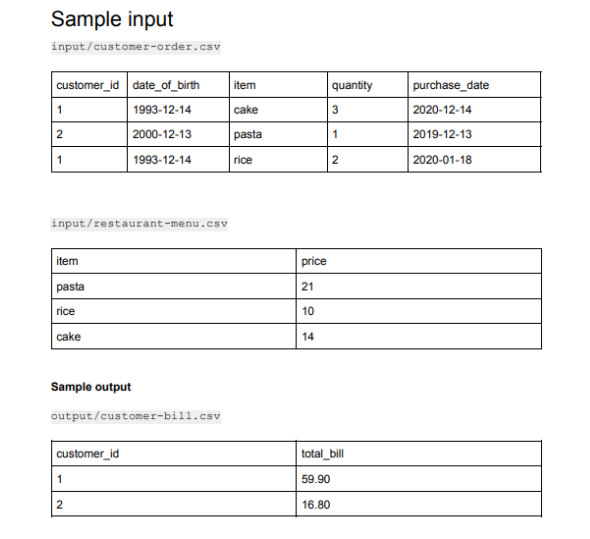

In [135]:
import csv

header = ['customer_id', 'date_of_birth', 'item', 'quantity', 'purchase_date']
data = [
    [1, '1993-12-14', 'cake', 3, '2020-12-14'],
    [2,  '2000-12-13', 'pasta', 1, '2019-12-13'],
    [1, '1993-12-14', 'rice', 2, '2020-01-18'],
    
]
with open('customer-order.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [136]:
header1= ['item', 'price']
data1=[
       ['pasta', 21],
       ['rice', 10],
       ['cake', 14],
]
with open('restaurant-menu.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header1)

    # write multiple rows
    writer.writerows(data1)

In [ ]:
##for manual data input

# from google.colab import files
# uploaded = files.upload()

In [137]:
import pandas as pd
from datetime import datetime, date
df1 = pd.read_csv('customer-order.csv')
df2 = pd.read_csv('restaurant-menu.csv')

In [138]:
print(df1)
print(df2)

   customer_id date_of_birth   item  quantity purchase_date
0            1    1993-12-14   cake         3    2020-12-14
1            2    2000-12-13  pasta         1    2019-12-13
2            1    1993-12-14   rice         2    2020-01-18
    item  price
0  pasta     21
1   rice     10
2   cake     14


In [139]:
# caculating age
df1['date_of_birth'] = pd.to_datetime(df1['date_of_birth'], format='%Y-%m-%d')
df1['purchase_date'] = pd.to_datetime(df1['purchase_date'], format='%Y-%m-%d')
df1['age'] = (df1['purchase_date'] - df1['date_of_birth']).astype('<m8[Y]') 

In [140]:
 # joining to dataframe on 'item' column
 s1 = pd.merge(df1, df2, how='left', on=['item'])

In [141]:
print(s1)

   customer_id date_of_birth   item  quantity purchase_date   age  price
0            1    1993-12-14   cake         3    2020-12-14  27.0     14
1            2    2000-12-13  pasta         1    2019-12-13  18.0     21
2            1    1993-12-14   rice         2    2020-01-18  26.0     10


In [142]:
#Adding and empty column
import numpy as np
s1["bill"] = np.nan

In [145]:
for i in s1.index: 
  # If a customer is younger than 25 years, he/she gets a 15% discount on all products on his/her birthday. 
  if s1['age'][i] < 25.0 and s1['date_of_birth'].dt.month[i] == s1['purchase_date'].dt.month[i] and s1['date_of_birth'].dt.day[i] == s1['purchase_date'].dt.day[i]:
    s1['bill'][i] = round(s1['price'][i] * s1['quantity'][i] - s1['price'][i] * s1['quantity'][i] * 0.15, 2)
  # If a customer is older than 60 years, he/she gets a 30% discount on all products on his/her birthday. 
  elif s1['age'][i] > 60.0 and s1['date_of_birth'].dt.month[i] == s1['purchase_date'].dt.month[i] and s1['date_of_birth'].dt.day[i] == s1['purchase_date'].dt.day[i]:
    s1['bill'][i] = round(s1['price'][i] * s1['quantity'][i] - s1['price'][i] * s1['quantity'][i] * 0.30, 2)
  # For the rest of the customers, they get a 5% discount on their birthday.
  elif s1['age'][i] >= 25.0 and s1['age'][i] <= 60 and s1['date_of_birth'].dt.month[i] == s1['purchase_date'].dt.month[i] and s1['date_of_birth'].dt.day[i] == s1['purchase_date'].dt.day[i] :
    s1['bill'][i] = round(s1['price'][i] * s1['quantity'][i] - s1['price'][i] * s1['quantity'][i]*0.05, 2)
  # There is a 20% discount on pasta regardless of the customer’s date of birth
  elif s1['item'][i] == 'pasta':
    s1['bill'][i] = round(s1['price'][i] * s1['quantity'][i] - s1['price'][i] * s1['quantity'][i] * 0.20, 2)
# otherwise, count the bill as usual
s1['bill'][i]  = round(s1['price'][i] * s1['quantity'][i], 2)


print(s1)


   customer_id date_of_birth   item  quantity purchase_date   age  price   bill
0            1    1993-12-14   cake         3    2020-12-14  27.0     14  39.90
1            2    2000-12-13  pasta         1    2019-12-13  18.0     21  17.85
2            1    1993-12-14   rice         2    2020-01-18  26.0     10  20.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel im

In [146]:
# for same customer_number, bill is summed up
aggregation_functions = {'bill': 'sum'}
df_new = s1.groupby(s1['customer_id']).aggregate(aggregation_functions)
df_new = df_new.rename(columns={'bill': 'total_bill'})
print(df_new)

             total_bill
customer_id            
1                 59.90
2                 17.85


In [147]:
# output.csv
df_new.to_csv('customer-bill.csv')